### World Happiness Report 2023 - Exploratory Data Analysis
- The World Happiness Report is an annual publication that ranks countries based on their happiness levels, as measured by a range of economic, social, and political indicators. It is designed to provide policymakers, academics, and the general public with insights into the factors that contribute to happiness and well-being around the world.
- In this project, an analysis of the World Happiness Report 2023 dataset was conducted, exploring the relationships between happiness scores, regional trends, and key indicators such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

#### Questions 
1. Which factors most significantly influence the overall happiness of a population?
2. How are these key happiness-related factors distributed across different global regions?
3. Among the variables provided (e.g., GDP, social support, freedom), which are the strongest predictors of happiness?
4. Which factor has the most substantial negative impact on national happiness levels?
5. What regional factors contribute to the consistent presence of Western European countries among the happiest and Sub-Saharan African countries among the least happy?

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#### Load the Dataset

In [3]:
whr_df = pd.read_csv('data/whr2023.csv')
whr_df.head()

,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,Armenia,ARM,Commonwealth of Independent States,5.342,0.066,5.470,5.213,9.615,0.790,67.789,...,-0.155,0.705,1.778,1.466,1.134,0.443,0.551,0.053,0.160,1.534


#### Filter the columns and keep only the ones that will be used for analysis
- Country name: name of the country
- iso alpha: the ISO alpha-3 country code for the respective country
- Regional indicator: the regional indicator to which the country belongs
- Happiness score: a numerical score representing the level of happiness reported by individuals in the country
- Logged GDP per capita: the logarithm of the country's gross domestic product (GDP) per capita, a measure of economic prosperity
- Social support: a measure of the perceived social support and social connections available to individuals in the country
- Healty life expectancy: the average number of years a person is expected to live in good health in the country
- Freedom to make life choices: is the national average of binary responses (0=no, 1=yes) to the GWP question 
- Generosity: this factor looks at how charitable a country’s people are
- Perception of corruption: this factor looks at the level of corruption in a country's government and business policies, and researchers use what they find to estimate happiness levels

In [4]:
columns = ['Country name', 'iso alpha', 'Regional indicator', 'Happiness score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df = whr_df[columns].copy()
df.head()

,Country name,iso alpha,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,ALB,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,DZA,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,ARG,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,ARM,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705


In [5]:
df.columns = df.columns.str.lower()
df.head()

,country name,iso alpha,regional indicator,happiness score,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
0,Afghanistan,AFG,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,ALB,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,DZA,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,ARG,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,ARM,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country name                  137 non-null    object 
 1   iso alpha                     137 non-null    object 
 2   regional indicator            137 non-null    object 
 3   happiness score               137 non-null    float64
 4   logged gdp per capita         137 non-null    float64
 5   social support                137 non-null    float64
 6   healthy life expectancy       136 non-null    float64
 7   freedom to make life choices  137 non-null    float64
 8   generosity                    137 non-null    float64
 9   perceptions of corruption     137 non-null    float64
dtypes: float64(7), object(3)
memory usage: 10.8+ KB


In [7]:
# Check for missing values
df.isnull().sum()

country name                    0
iso alpha                       0
regional indicator              0
happiness score                 0
logged gdp per capita           0
social support                  0
healthy life expectancy         1
freedom to make life choices    0
generosity                      0
perceptions of corruption       0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,country name,iso alpha,regional indicator,happiness score,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
116,State of Palestine,PSE,Middle East and North Africa,4.908,8.716,0.859,NaN,0.694,-0.132,0.836


<i>A missing value has been identified in the healthy life expectancy column for the country State of Palestine. It has been decided to leave the value as is, because it will not affect the analysis</i>

### Filter the numerical value columns for further analysis

In [10]:
numerical_columns = ['happiness score', 'logged gdp per capita', 'social support', 'healthy life expectancy', 'freedom to make life choices', 'generosity', 'perceptions of corruption']
df[numerical_columns].describe()

,happiness score,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


<i>Key Insights:
- Happiness Score: with an average of ~5.54 suggests a moderate level of happiness across countries; with a relatively wide range (1.86 to 7.80) which indicates substantial variation in well-being across different nations
- Logged GDP per capita: with a mean of ~9.45 and a relatively high maximum (11.66), income levels are generally strong in the dataset. Higher income contributes significantly to happiness
- Social Support: a high average (0.80) and a small standard deviation (0.13) suggest that most people report access to social support. This is a consistently strong positive factor across countries
- Healty Life Expectancy: the average of ~65 years reflects relatively good health outcomes globally, but the range (51.53 to 77.28) reveals notable health inequality among countries, which can significantly affect happiness levels
- Freedom to make life choices: a mean of ~0.79 and a small standard deviation, freedom is generally high and consistent across countries
- Generosity: the average generosity score is very low (~0.02), and the values include negatives, indicating that in many countries people do not perceive strong generosity or trust among others
- Perception of Corruption: a high mean (~0.73) indicates that most people believe corruption is dominant in their countries

### Visualize the Distribution of Numerical Data using Histograms and Boxplots
- Histograms help to show the shape and the central tendencies of the data, and simplifies the process of analyzing key statistics by adding vertical lines 
- Boxplots summarize the spread of the data and easily identifies any outliers

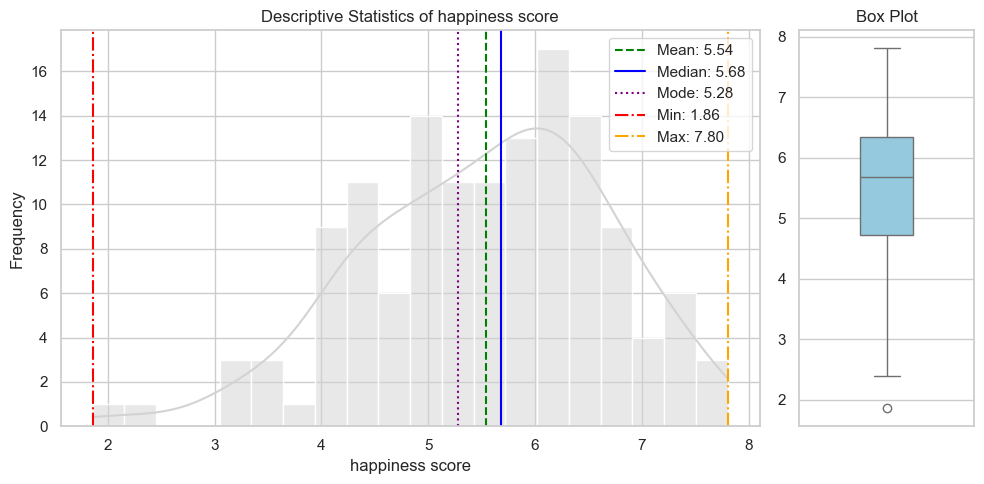

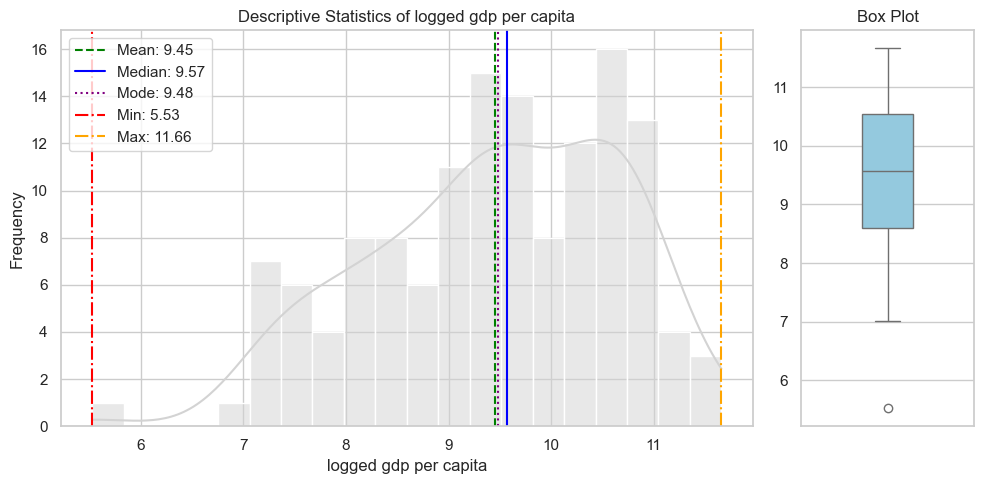

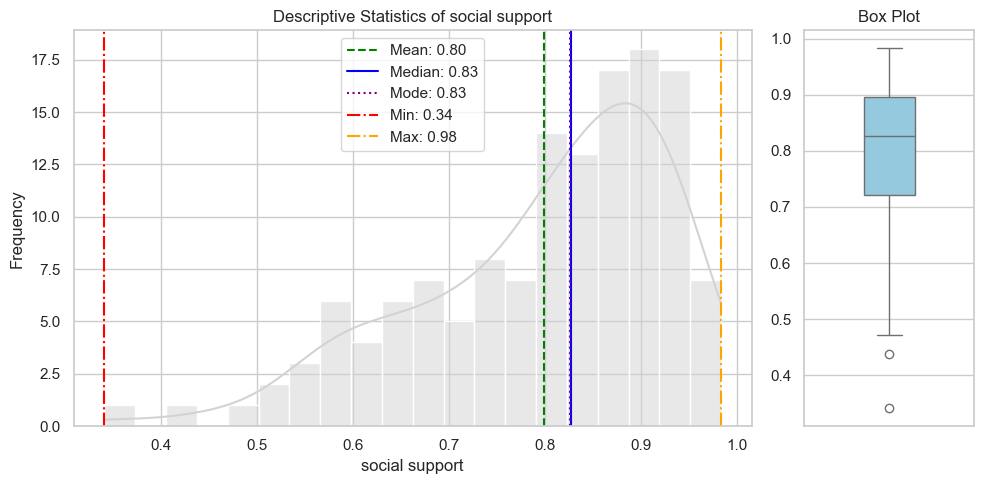

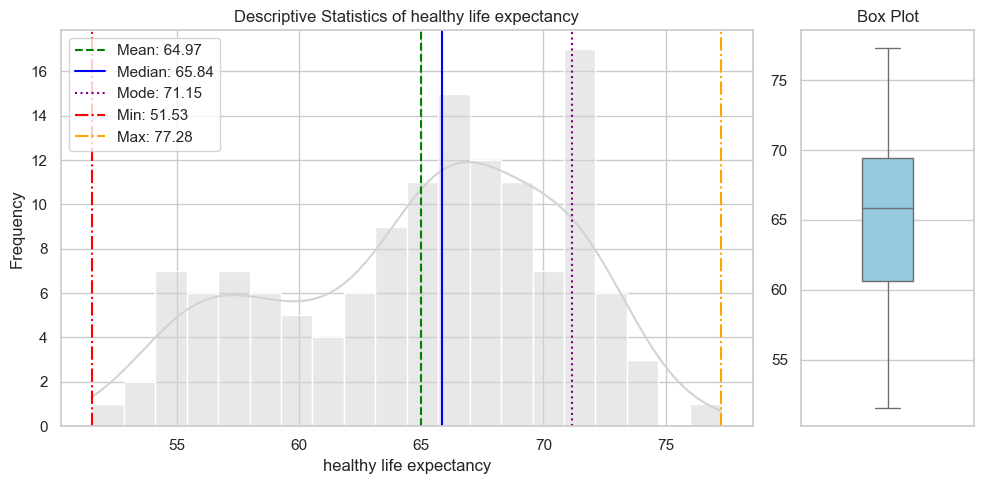

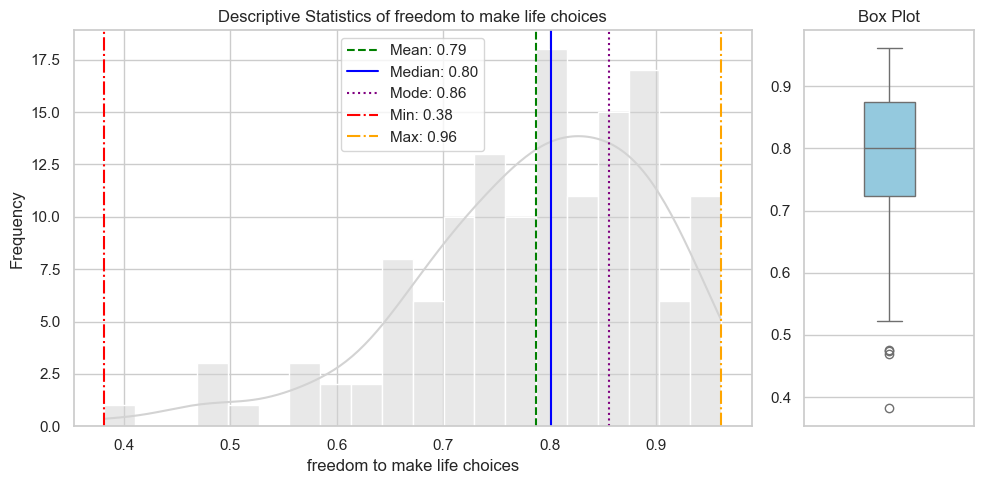

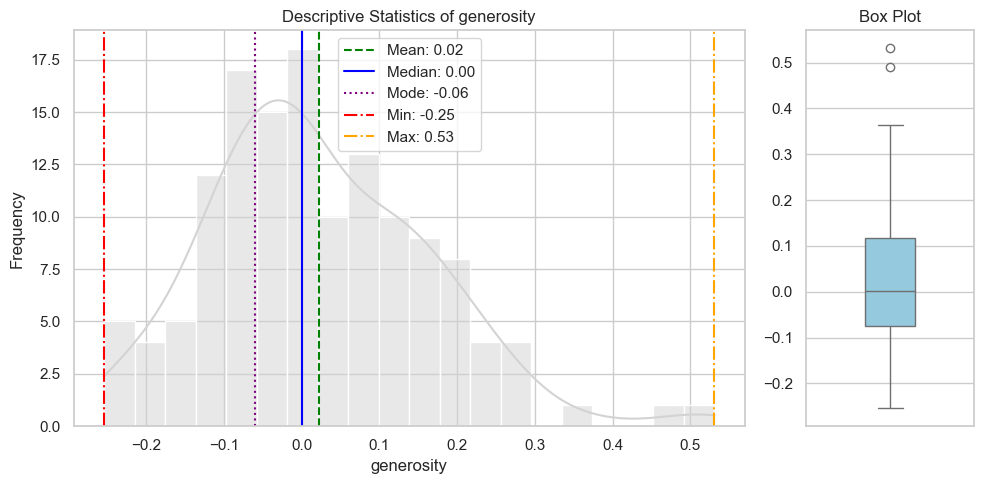

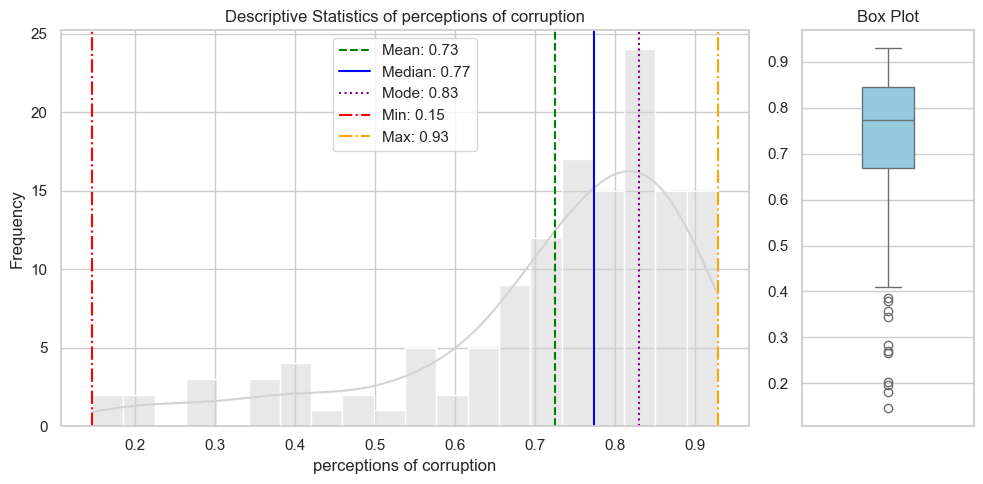

In [17]:
# List of variables to plot
variables = [
    'happiness score',
    'logged gdp per capita',
    'social support',
    'healthy life expectancy',
    'freedom to make life choices',
    'generosity',
    'perceptions of corruption'
]
# Loop through variables
for var in variables:
    # Create side-by-side subplots (1 row, 2 columns)
    fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [4, 1]})

    # Histogram
    sns.histplot(df[var], bins=20, kde=True, color='lightgray', ax=ax_hist)

    # Summary statistics
    mean = df[var].mean()
    median = df[var].median()
    mode = df[var].mode().iloc[0] # first mode in case of multiple modes
    min_val = df[var].min()
    max_val = df[var].max()

    # Vertical lines
    ax_hist.axvline(mean, color='green', linestyle='--', label=f'Mean: {mean:.2f}')
    ax_hist.axvline(median, color='blue', linestyle='-', label=f'Median: {median:.2f}')
    ax_hist.axvline(mode, color='purple', linestyle=':', label=f'Mode: {mode:.2f}')
    ax_hist.axvline(min_val, color='red', linestyle='-.', label=f'Min: {min_val:.2f}')
    ax_hist.axvline(max_val, color='orange', linestyle='-.', label=f'Max: {max_val:.2f}')

    ax_hist.set_title(f'Descriptive Statistics of {var}')
    ax_hist.set_xlabel(var)
    ax_hist.set_ylabel('Frequency')
    ax_hist.legend()

    # Box plot (vertical, on right)
    sns.boxplot(y=df[var], color='skyblue', ax=ax_box, width=0.3)
    ax_box.set_title('Box Plot')
    ax_box.set_xlabel('')
    ax_box.set_ylabel('')

    plt.tight_layout()
    plt.show()
 

<i>Outliers have been identified in the distribution of perceptions of corruption. Despite this, it has been decided to keep them in the analysis as they may indicate the existence of extraordinary situations in the country.

#### Heatmap to visualize the correlation between happines score and the other factors 

<Axes: >

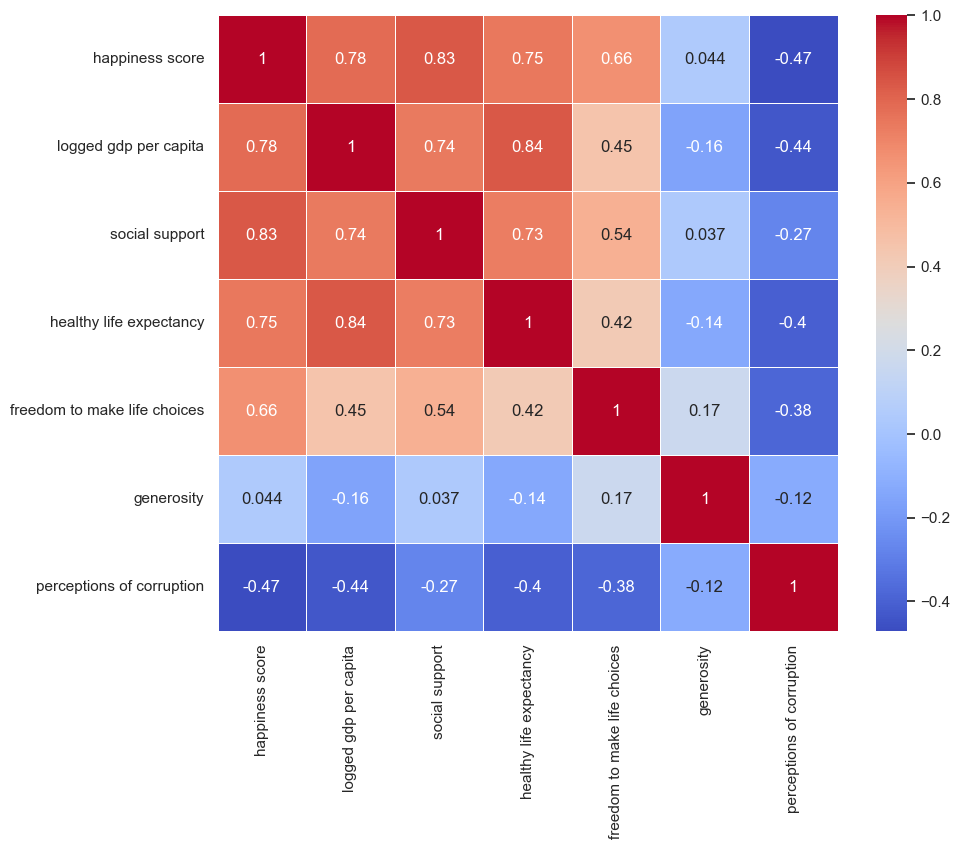

In [23]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidth=0.5, cmap='coolwarm')


<i>This heat map reveals several strong correlations between factors and happiness score:
- Countries with higher GDP per capita, healthier life expectancies, greater freedom to make choices, and stronger social support tend to have higher happiness scores.
- A strong positive correlation has been found between GDP per capita, healthy life expectancy, and social support.
- A negative correlation has been found between happiness score and perceptions of corruption, this suggests that maintaining high levels of happiness among citizens may be challenging for countries with higher levels of corruption. <br>
Overall, these findings highlight the importance of economic, social, and political factors in determining happiness levels across countries.

### Analysis of happiness score and other factors across different regions
An analysis is conducted to further explore the factors that may contribute to higher or lower happiness scores across different regions.
- A bar chart is created to depict the average values of various factors, such as GDP per capita, social support, healthy life expectancy, etc., across different regions.
- A box plot is generated to observe the outliers that may occur.

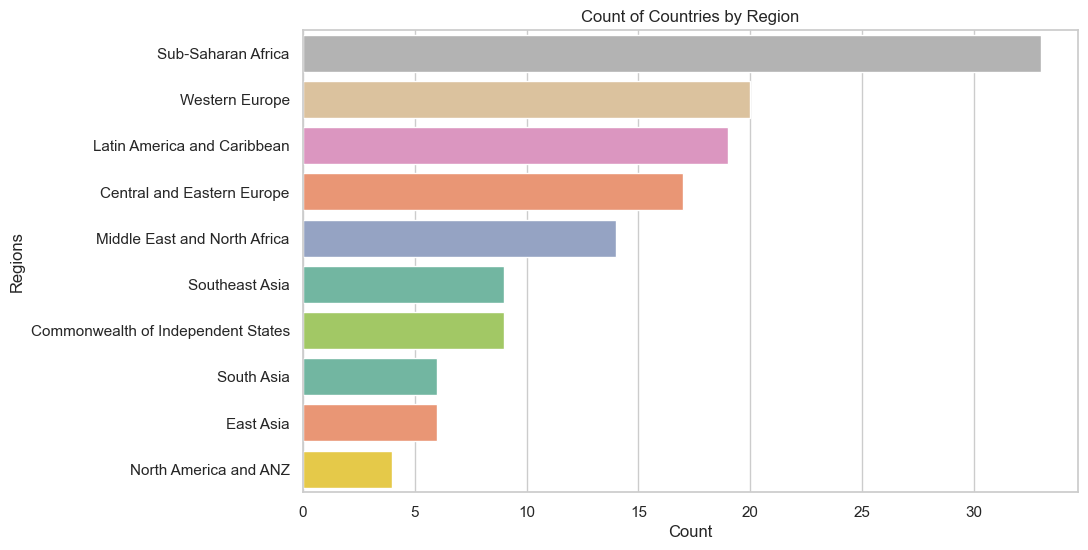

In [25]:
# Count of countries in each region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='regional indicator',hue='regional indicator', order=df['regional indicator'].value_counts().index, palette='Set2', legend=False)
plt.title('Count of Countries by Region')
plt.xlabel('Count')
plt.ylabel('Regions')
plt.show()


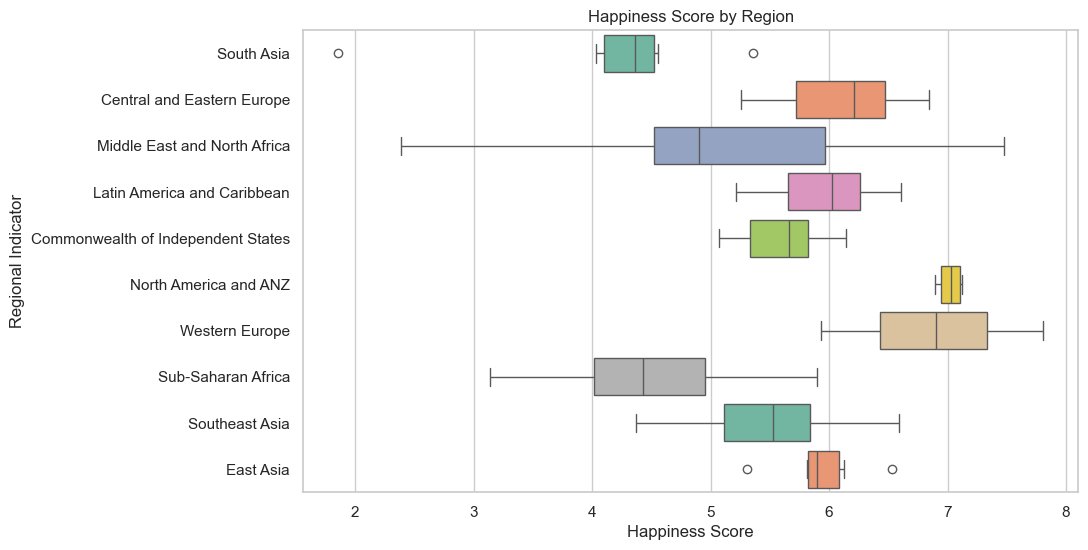

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='happiness score', y='regional indicator',hue='regional indicator', palette='Set2', legend=False)
plt.title('Happiness Score by Region')
plt.xlabel('Happiness Score')
plt.ylabel('Regional Indicator')
plt.show()


<i> Box Plot Analysis
-  Higher median happiness scores are observed in the Western Europe, North America, and ANZ regions compared to other regions
- An outlier is observed in the South Asia region, where Afghanistan has a notably lower happiness score, this may be attributed to political instability and a lower healthy life expectancy in Afghanistan.


#### Bar Plot Analysis of the average values for each factor across different regions

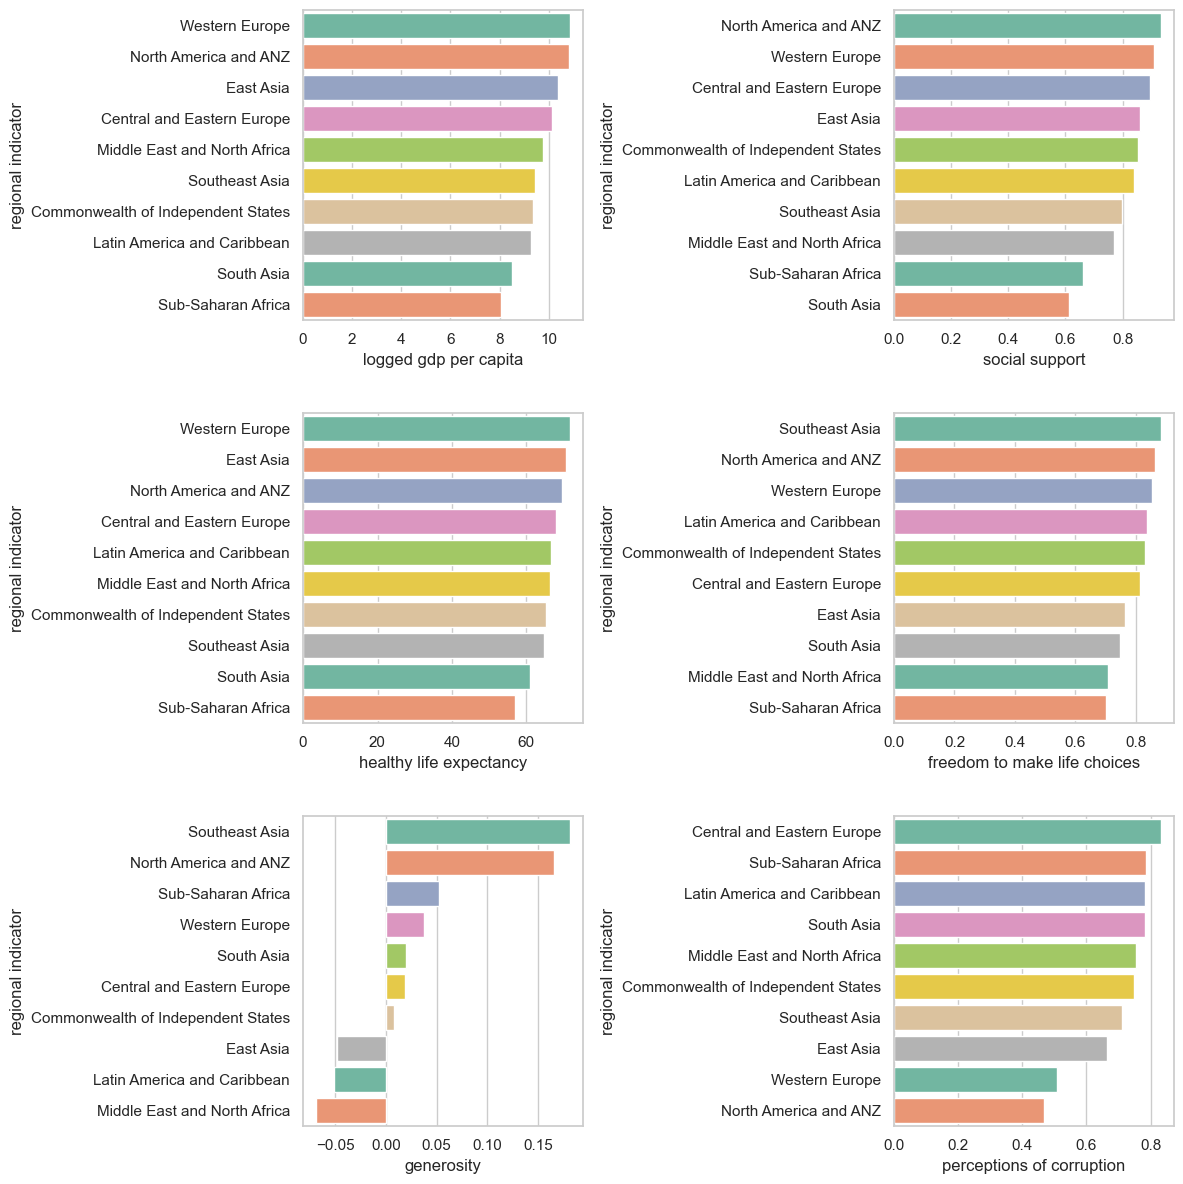

In [35]:
region_wise = df.groupby("regional indicator")[numerical_columns].mean().reset_index()
fig, ax = plt.subplots(3, 2, figsize = (12,12))
for i, column in enumerate(numerical_columns[1:]):
    region_wise.sort_values(column, ascending = False, inplace = True)
    sns.barplot(region_wise, x = column, y = 'regional indicator',hue='regional indicator', palette = 'Set2', legend=False, ax = ax[i//2, i%2])
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
#fig.show()

<i> Bar Plot Analysis:
- It is suggested by this analysis that regions with higher median happiness scores, such as Western Europe, North America, and ANZ, tend to have higher average values in various key factors, including GDP per capita, social support, healthy life expectancy, and freedom to make life choices, compared to regions with lower median happiness scores
- Also, these regions exhibit lower average values in factors that are negatively associated with happiness levels, such as perceptions of corruption <br><br>
These findings underscore the significance of economic prosperity, social support networks, access to healthcare, and freedom to make life choices in promoting happiness and well-being across different regions.

#### Top 10 happiest and least happy countries

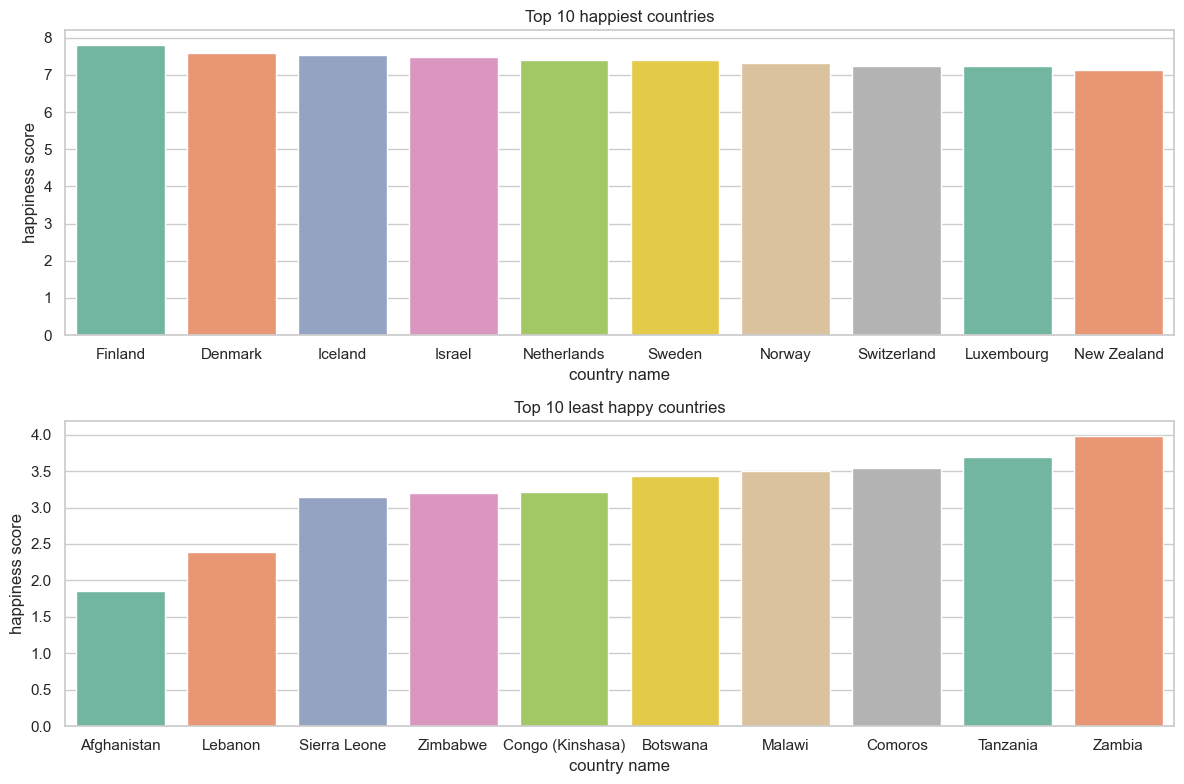

In [34]:
#A column chart was created to analyze the top 10 happiest and least happy countries.
top_10_happy_country = df.sort_values('happiness score', ascending = False)
bottom_10_happy_country = df.sort_values('happiness score', ascending = True)

fig, ax = plt.subplots(2, 1, figsize = (12,8))

sns.barplot(top_10_happy_country.iloc[:10], y = 'happiness score', x = 'country name', hue='country name', palette = 'Set2', legend=False, ax = ax[0])
ax[0].set_title("Top 10 happiest countries")



sns.barplot(bottom_10_happy_country.iloc[:10], y = 'happiness score', x = 'country name', hue='country name', palette = 'Set2', legend=False, ax = ax[1])
ax[1].set_title("Top 10 least happy countries")

fig.tight_layout()
#fig.show()

<i> Bar Plot Analysis:
- The analysis revealed that eight out of the top 10 happiest countries are from the Western Europe region
- Similarly, the analysis of the top 10 least happy countries showed that eight out of 10 countries are from the Sub-Saharan Africa region

#### Conclusion
1. Which factors most significantly influence the overall happiness of a population? <br>Response: Countries with higher GDP per capita, healthier life expectancies, greater freedom to make choices, and stronger social support tend to have higher happiness scores.
2. How are these key happiness-related factors distributed across different global regions? <br>Response: See Bar Plot of the Average values for each Region
3. Among the variables provided (e.g., GDP, social support, freedom), which are the strongest predictors of happiness? <br>Response: GDP per capita
4. Which factor has the most substantial negative impact on national happiness levels? <br>Response: perceptions of corruption
5. What regional factors contribute to the consistent presence of Western European countries among the happiest and Sub-Saharan African countries among the least happy? <br>Response: higher average values in various key factors, including GDP per capita, social support, healthy life expectancy, and freedom to make life choices, compared to regions with lower median happiness scores.
<br><br>
In conclusion, this project has provided a comprehensive analysis of happiness scores around the world, highlighting the importance of economic, social, and health factors in determining individual and societal well-being. The findings suggest that promoting economic prosperity, social support networks, and access to healthcare can contribute to higher levels of happiness, while reducing corruption can help ensure that these gains are sustainable over time. By prioritizing happiness as a key goal for individuals, communities, and policymakers, we can work towards creating a world that is more just, equitable, and fulfilling for all.